# Text Analysis 

In this notebook I'll go deep and perform a natural language processing analysis 

Off the bat I'm thinking 

 - Sentiment 
     - overall distribution
     - most popular for each person 
 - Tone 
     - overall distribution
     - most popular for each person 
 - Key topics
     - remove stop words
     - most popular words 
     - zero shot topics 


That feels like plenty - I've really been dragging on this project. The main purpose is suppose to be the article I publish. And to impress my friends lol. 


Citations: 

https://arxiv.org/abs/2106.09462
@misc{perez2021pysentimiento,
      title={pysentimiento: A Python Toolkit for Sentiment Analysis and SocialNLP tasks},
      author={Juan Manuel Pérez and Juan Carlos Giudici and Franco Luque},
      year={2021},
      eprint={2106.09462},
      archivePrefix={arXiv},
      primaryClass={cs.CL}
}



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline
from huggingface_hub import hf_hub_download
import pandas as pd

2024-05-29 08:44:35.999777: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('engineerd_public_df.csv')

In [3]:
df.head()

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name
0,Emphasized “You are hot amanda ”,6.0,0.0,2023-01-01 04:27:21,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,True,False,False,False,0.0,0.0,You are hot amanda,Emphasized,You are hot amanda,NaN,NaN
1,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN
2,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN
3,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN
4,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN


In [4]:
text_messages = df[(df.reaction.isnull())&(df.body.notnull())].reset_index(drop=True)
text_messages

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name
0,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN
1,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN
2,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN
3,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN
4,Here is the grandma!\nShe is a painter. I’m ta...,6.0,0.0,2023-01-01 10:23:41,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Here is the grandma!\nShe is a painter. I’m ta...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Wow,6.0,0.0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Wow,NaN,NaN,NaN,NaN
3936,Watched that w sound in front of my mom,6.0,0.0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Watched that w sound in front of my mom,NaN,NaN,NaN,NaN
3937,This is one of the best yet,6.0,0.0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,This is one of the best yet,NaN,NaN,NaN,NaN
3938,"Rhyming the word eunuch, climbing into a butth...",6.0,0.0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,"Rhyming the word eunuch, climbing into a butthole",NaN,NaN,NaN,NaN


## Sentiment

In [5]:
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

Okay for this section we only care about actual text messages, not reactions 

In [6]:
texts = text_messages.body.to_list()
len(texts)


3940

In [7]:
sentiment_results = pipe(texts, truncation=True)

In [8]:
len(sentiment_results)

3940

In [9]:
sentiment_results[-1]

{'label': 'NEU', 'score': 0.9586372375488281}

In [10]:
sentiment_df = pd.DataFrame(sentiment_results)

In [11]:
sentiment_df

,label,score
0,POS,0.992521
1,NEU,0.490084
2,NEG,0.682532
3,NEU,0.950791
4,NEU,0.699504
...,...,...
3935,POS,0.742515
3936,NEU,0.959563
3937,POS,0.991886
3938,POS,0.571660


In [12]:
sentiment_df.to_csv('sentiment_df.csv')

In [13]:
sentiment_df = pd.read_csv('sentiment_df.csv')

In [14]:
sentiment_df.shape

(3940, 3)

In [15]:
text_messages.shape

(3940, 20)

In [16]:
text_messages


,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,Laughed,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name
0,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN
1,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN
2,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN
3,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,False,False,False,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN
4,Here is the grandma!\nShe is a painter. I’m ta...,6.0,0.0,2023-01-01 10:23:41,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Here is the grandma!\nShe is a painter. I’m ta...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Wow,6.0,0.0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Wow,NaN,NaN,NaN,NaN
3936,Watched that w sound in front of my mom,6.0,0.0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,Watched that w sound in front of my mom,NaN,NaN,NaN,NaN
3937,This is one of the best yet,6.0,0.0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,This is one of the best yet,NaN,NaN,NaN,NaN
3938,"Rhyming the word eunuch, climbing into a butth...",6.0,0.0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,False,False,False,0.0,0.0,"Rhyming the word eunuch, climbing into a butthole",NaN,NaN,NaN,NaN


In [17]:
result = pd.concat([text_messages, sentiment_df], axis=1)
result

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,...,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name,Unnamed: 0,label,score
0,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN,0,POS,0.992521
1,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN,1,NEU,0.490084
2,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN,2,NEG,0.682532
3,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN,3,NEU,0.950791
4,Here is the grandma!\nShe is a painter. I’m ta...,6.0,0.0,2023-01-01 10:23:41,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,Here is the grandma!\nShe is a painter. I’m ta...,NaN,NaN,NaN,NaN,4,NEU,0.699504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Wow,6.0,0.0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,Wow,NaN,NaN,NaN,NaN,3935,POS,0.742515
3936,Watched that w sound in front of my mom,6.0,0.0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,Watched that w sound in front of my mom,NaN,NaN,NaN,NaN,3936,NEU,0.959563
3937,This is one of the best yet,6.0,0.0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,This is one of the best yet,NaN,NaN,NaN,NaN,3937,POS,0.991886
3938,"Rhyming the word eunuch, climbing into a butth...",6.0,0.0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,0.0,0.0,"Rhyming the word eunuch, climbing into a butthole",NaN,NaN,NaN,NaN,3938,POS,0.571660


In [18]:
name_dict = {0:"Me", 1:"Jean", 2:"Rain", 3:"Amelia", 4:"Stormi", 5:"Lan", 6:"Adeline", 231:"Jean", 356:"Jean"}
result = result.copy()
result.loc[:, "Name"] = result["handle_id"].map(name_dict)

Text(0.5, 1.0, 'Distribution of Labels for Each Person')

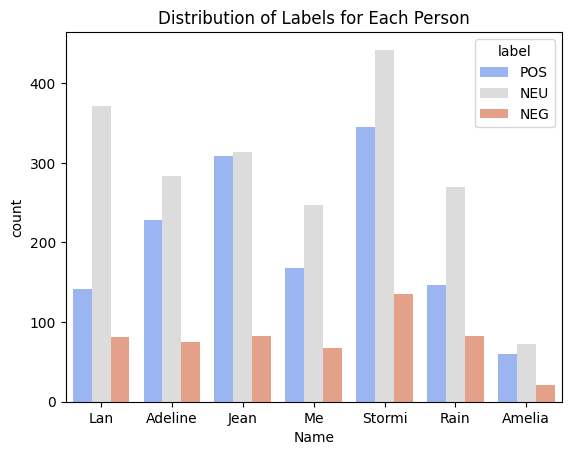

In [19]:
# Set a color palette
colors = sns.color_palette("coolwarm", n_colors=len(result["label"].unique()))

# Create a stacked bar plot
sns.countplot(x="Name", hue="label", data=result, palette=colors)

# Set title
plt.title("Distribution of Labels for Each Person")

normalized sentiment

In [20]:
# Code from https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot thx you<3
x,y = 'Name', 'label'
df1 = result.groupby(x)[y].value_counts(normalize=True)

df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

df1.head()


,Name,label,percent
0,Adeline,NEU,48.381601
1,Adeline,POS,38.841567
2,Adeline,NEG,12.776831
3,Amelia,NEU,47.058824
4,Amelia,POS,39.215686


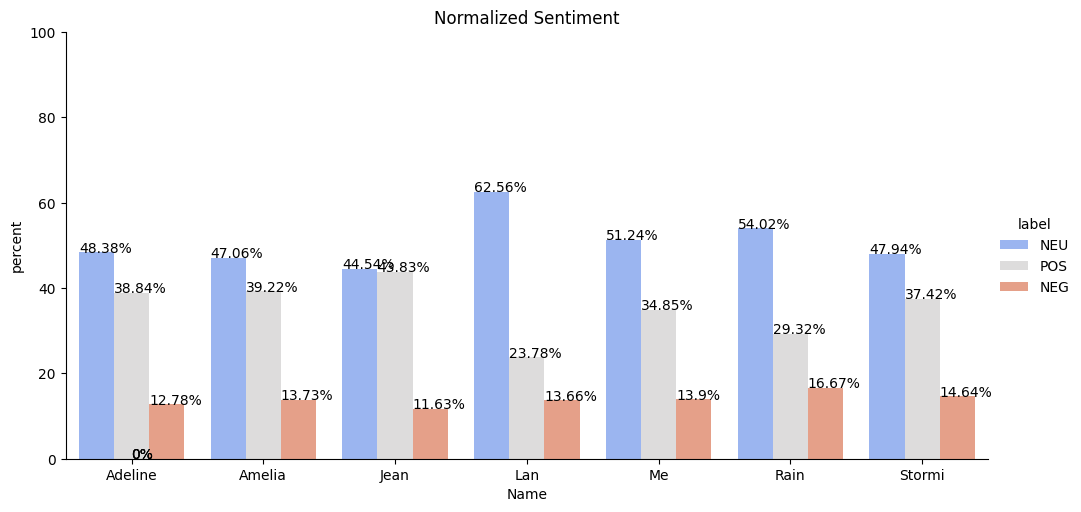

In [21]:
# plt.figure(figsize=(, 40)) 
colors = sns.color_palette("coolwarm", n_colors=len(result["label"].unique()))
g = sns.catplot(x=df1.Name,y=df1.percent,hue=df1.label,kind='bar', palette= colors, aspect=2).set(title = "Normalized Sentiment")
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(round(p.get_height(),2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


## Summarization of Each Month

In [47]:
# TODO: insert open ai key 
from openai import OpenAI
# key = ""
# client = OpenAI(api_key=key)

In [23]:
# Combine 'Column1' antext_messages'Column2' into a new column 'Combinetext_messages
text_messages['combo'] = text_messages['Name'].astype(str) +':'+ text_messages['body']
text_messages

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,...,Liked,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name,combo
0,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,False,False,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN,Lan:A great night in Atlanta
1,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN,Adeline:awwwwwwweewweeewee
2,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN,Adeline:I’m so jealous I want to be Jacko in e...
3,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,False,False,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN,Lan:Avi can you send a pic of dans grandma
4,Here is the grandma!\nShe is a painter. I’m ta...,6.0,0.0,2023-01-01 10:23:41,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,Here is the grandma!\nShe is a painter. I’m ta...,NaN,NaN,NaN,NaN,Adeline:Here is the grandma!\nShe is a painter...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,Wow,6.0,0.0,2023-12-31 21:46:46,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,Wow,NaN,NaN,NaN,NaN,Adeline:Wow
3936,Watched that w sound in front of my mom,6.0,0.0,2023-12-31 21:46:53,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,Watched that w sound in front of my mom,NaN,NaN,NaN,NaN,Adeline:Watched that w sound in front of my mom
3937,This is one of the best yet,6.0,0.0,2023-12-31 21:49:32,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,This is one of the best yet,NaN,NaN,NaN,NaN,Adeline:This is one of the best yet
3938,"Rhyming the word eunuch, climbing into a butth...",6.0,0.0,2023-12-31 21:50:40,2023-12-31 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,False,0.0,0.0,"Rhyming the word eunuch, climbing into a butthole",NaN,NaN,NaN,NaN,"Adeline:Rhyming the word eunuch, climbing into..."


In [24]:
text_messages['message_datetime'] = pd.to_datetime(text_messages['message_datetime'])

In [25]:
text_messages['message_datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3940 entries, 0 to 3939
Series name: message_datetime
Non-Null Count  Dtype         
--------------  -----         
3940 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 30.9 KB


In [27]:
text_messages['month_column'] = text_messages['message_datetime'].dt.month
text_messages.head()

,body,handle_id,is_from_me,message_datetime,message_date,display_name,group_chat_name,Name,link,Emphasized,...,Loved,emoji_count_first_49,emoji_count,shortened_text,reaction,reaction_text,reaction_id,reaction_name,combo,month_column
0,A great night in Atlanta,5.0,0.0,2023-01-01 10:07:03,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,False,0.0,0.0,A great night in Atlanta,NaN,NaN,NaN,NaN,Lan:A great night in Atlanta,1
1,awwwwwwweewweeewee,6.0,0.0,2023-01-01 10:16:10,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,0.0,0.0,awwwwwwweewweeewee,NaN,NaN,NaN,NaN,Adeline:awwwwwwweewweeewee,1
2,I’m so jealous I want to be Jacko in everyone’...,6.0,0.0,2023-01-01 10:16:45,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,0.0,0.0,I’m so jealous I want to be Jacko in everyone’s a,NaN,NaN,NaN,NaN,Adeline:I’m so jealous I want to be Jacko in e...,1
3,Avi can you send a pic of dans grandma,5.0,0.0,2023-01-01 10:17:01,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Lan,False,False,...,False,0.0,0.0,Avi can you send a pic of dans grandma,NaN,NaN,NaN,NaN,Lan:Avi can you send a pic of dans grandma,1
4,Here is the grandma!\nShe is a painter. I’m ta...,6.0,0.0,2023-01-01 10:23:41,2023-01-01 00:00:00,The real housewives of GT,The real housewives of GT,Adeline,False,False,...,False,0.0,0.0,Here is the grandma!\nShe is a painter. I’m ta...,NaN,NaN,NaN,NaN,Adeline:Here is the grandma!\nShe is a painter...,1


In [28]:
def first_summary_openai(string, month):
    completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
      {"role": "system", "content": "You are a gossip-savvy AI summarizer, skilled in capturing the juiciest details of events with a flair for intrigue."},
      {"role": "user", "content": f"Summarize the following group text message conversation from the beginning of {month} in 1-2 sentances:{string}"}
      ]
    )

    return completion.choices[0].message.content

In [29]:
def middle_summary_openai(string, month):
    completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
      {"role": "system", "content": "You are a gossip-savvy AI summarizer, skilled in capturing the juiciest details of events with a flair for intrigue."},
      {"role": "user", "content": f"Provide a brief and sizzling summary of the following group text message conversation. Keep it to 1-2 sentances. Start the summary with 'Towards the middle of the month':{string}"}
      ]
    )

    return completion.choices[0].message.content

In [30]:
def end_summary_openai(string, month):
    completion = client.chat.completions.create(
      model="gpt-3.5-turbo",
      messages=[
      {"role": "system", "content": "You are a gossip-savvy AI summarizer, skilled in capturing the juiciest details of events with a flair for intrigue."},
      {"role": "user", "content": f"Provide a brief and sizzling summary of the following group text message conversation. Keep it to 1-2 sentances. Start the summary with 'At the end of this month':{string}"}
      ]
    )

    return completion.choices[0].message.content

In [31]:
months = ['January','February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
summarys = {}
for i in range(1,13): 
    texts=text_messages[text_messages['month_column']==i]

    listy = texts['combo'].to_list()
    text_string = ""

    for s in listy:
        text_string += s+'. '
    text_string = text_string.replace('\n', ' ')

    split = len(text_string )//3
    twoThirds = split+split

    # for j in range(2):
    part1 = text_string[:split]
    part2 = text_string[split:twoThirds]
    part3 = text_string[twoThirds:]
    
    # Call openai 
    part1_sum = first_summary_openai(part1, months[i-1])
    part2_sum = middle_summary_openai(part2, months[i-1])
    part3_sum = end_summary_openai(part3, months[i-1])
    
    month_total = part1_sum + ' ' + part2_sum + ' ' +part3_sum
    summarys[months[i-1]] = month_total

In [32]:
summarys

{'January': "A group text conversation in early January mentions a visit to Atlanta, exploring ruins, family interactions, cats, cocktails, and water flossers. The chat also delves into anxiety symptoms, dental hygiene, future travel plans, rumors about unhealthy eating habits, and candid discussions about periods and free bleeding. Additionally, they share selfies, compliment outfits, and talk about pregnancy statistics in different age groups. Towards the middle of the month, a group text conversation unfolds with discussions ranging from fertility stats and waxing experiences to Instagram giveaways and London meetups, culminating in updates on travels, budding romances, strange signs at career fairs, and reflections on overcoming job challenges. Drama and camaraderie intertwine as these friends share their daily adventures and personal milestones with flair. At the end of this month, a group text chat unfolded with updates ranging from paying off medical bills to law school stress, 

In [33]:
import json 

# Specify the file path where you want to save the JSON file
file_path = "summary.json"

# Use the json.dump() function to save the dictionary as a JSON file
with open(file_path, "w") as json_file:
    json.dump(summarys, json_file)

In [34]:
# Use the json.load() function to read the JSON file into a dictionary
with open(file_path, "r") as json_file:
    loaded_dict = json.load(json_file)

In [35]:
loaded_dict['January']

"A group text conversation in early January mentions a visit to Atlanta, exploring ruins, family interactions, cats, cocktails, and water flossers. The chat also delves into anxiety symptoms, dental hygiene, future travel plans, rumors about unhealthy eating habits, and candid discussions about periods and free bleeding. Additionally, they share selfies, compliment outfits, and talk about pregnancy statistics in different age groups. Towards the middle of the month, a group text conversation unfolds with discussions ranging from fertility stats and waxing experiences to Instagram giveaways and London meetups, culminating in updates on travels, budding romances, strange signs at career fairs, and reflections on overcoming job challenges. Drama and camaraderie intertwine as these friends share their daily adventures and personal milestones with flair. At the end of this month, a group text chat unfolded with updates ranging from paying off medical bills to law school stress, secret roman

## Topic Clustering

In [36]:
from transformers import pipeline
from tqdm import tqdm
pipe = pipeline(model="facebook/bart-large-mnli")

In [37]:
message_list = text_messages['body'].to_list()

In [38]:
import pandas as pd
from tqdm import tqdm

# Function to process messages in batches and yield results
def process_messages_batch(message_list, batch_size=500):
    results_list = []

    for i in range(1000, len(message_list), batch_size):
        batch_messages = message_list[i:i + batch_size]

        # Iterate through the batch of messages
        for message in tqdm(batch_messages, desc=f"Processing batch {i // batch_size + 1}", unit="message"):
            # Get the scores for each candidate label
            result = pipe(message, candidate_labels=["Franky", "weekend plans", "Significant others", "life updates", "politics"])

            # Create a dictionary with the message and scores
            entry = {"short_message": message}
            entry.update({label: score for label, score in zip(result['labels'], result['scores'])})

            # Append the dictionary to the results list
            results_list.append(entry)

        # Save the results for the current batch
        df = pd.DataFrame(results_list)
        df.to_csv(f'results_batch_{i // batch_size + 1}.csv', index=False)
        results_list = []  # Clear the list for the next batch

# Assuming you have a list of messages called message_list
process_messages_batch(message_list)


Processing batch 8: 100%|██████████| 440/440 [13:06<00:00,  1.79s/message] 


In [39]:
import glob

# Specify the directory where your CSV files are located
# directory = '/path/to/your/files/'

# Define the pattern of your CSV files
file_pattern = 'results_batch_*.csv'

# Get a list of all CSV files matching the pattern
csv_files = glob.glob(file_pattern)

# Initialize an empty DataFrame to store the combined data
big_df = pd.DataFrame()

# Iterate through each CSV file and concatenate it to the big_df
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    big_df = pd.concat([big_df, df], ignore_index=True)

big_df

,short_message,Significant others,life updates,Franky,politics,weekend plans
0,Idk but last night I had a double dog and it w...,0.722494,0.193413,0.052760,0.015731,0.015602
1,Woah,0.483711,0.199318,0.162837,0.062280,0.091854
2,YESSS,0.565428,0.186461,0.131265,0.031931,0.084915
3,i didn’t know that was allowed!!!,0.294830,0.192869,0.219460,0.101509,0.191332
4,There was too much bun for the tiny little dog...,0.211554,0.479028,0.141393,0.080459,0.087566
...,...,...,...,...,...,...
2935,that is so funny it looks like a wax foot,0.348618,0.224872,0.269929,0.067085,0.089495
2936,"In case anyone is back on costar, I redownload...",0.353545,0.337313,0.114496,0.062618,0.132026
2937,U better not,0.489293,0.166341,0.150613,0.079939,0.113813
2938,You better,0.370406,0.271076,0.146532,0.075626,0.136360


In [40]:
cols = big_df.columns.to_list()[1:]
cols

['Significant others', 'life updates', 'Franky', 'politics', 'weekend plans']

In [43]:
c = 'Significant others'

In [44]:
len(big_df[big_df[c]>=.80])

82

In [45]:
cols= big_df.columns.to_list()[1:]
for c in cols: 
    print(f"Very rough percent of time we talk about {c}: {len(big_df[big_df[c]>=.80])/3923}")

Very rough percent of time we talk about Significant others: 0.020902370634718326
Very rough percent of time we talk about life updates: 0.007137394850879429
Very rough percent of time we talk about Franky: 0.003823604384399694
Very rough percent of time we talk about politics: 0.0002549069589599796
Very rough percent of time we talk about weekend plans: 0.010196278358399185
